# How likely is your child to apply to university?

The purpose of this study is to identify and extract relationships betwee, parent's education, type of schooling and their childs GPA on the likeliness of them applying to university.

This study will leverage Linear Regression to examine the relationships.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from statsmodels.tools.eval_measures import rmse
from pandas.api.types import CategoricalDtype

# 1. Init

In [2]:
# Read the data
df = pd.read_csv('gpa.csv')
df.head()

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


# 2. Clean

In [3]:
# Covert `pared` to categorical
df["pared"] = df["pared"].astype('category')

# Covert `public` to categorical
df["public"] = df["public"].astype('category')

# Convert `apply` to ordianal
apply_cat = CategoricalDtype(categories = ['unlikely', 'somewhat likely', 'very likely'], ordered = True)
df["apply"] = df["apply"].astype(apply_cat)


# 3. Inspect

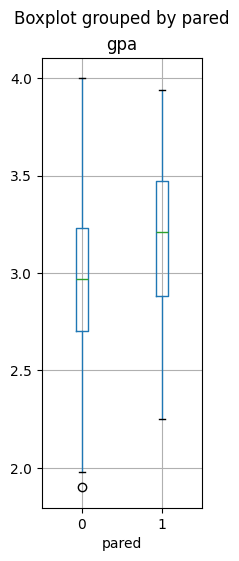

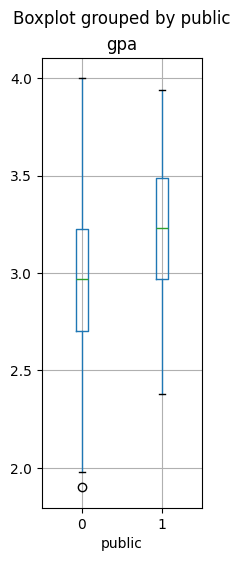

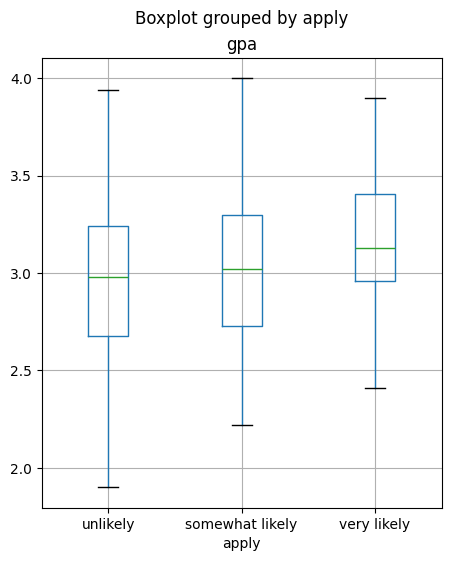

In [15]:
# Boxplots 

# Parents education
df.boxplot(column="gpa", by= "pared", figsize= (2,6))
plt.show()

# Public school
df.boxplot(column="gpa", by= "public", figsize= (2,6))
plt.show()

# Did they apply?
df.boxplot(column="gpa", by= "apply", figsize= (5,6))
plt.show()

# 4. Engineering (One-Hot Encoding)

In [16]:
# Polynomial encoding
# To create two dummy variables - linear and square encoding of the "apply" status. This can be easily done using pandas map funcion

# We will first create mapper
mapper = {'unlikely' : 0, 'somewhat likely' : 1, 'very likely' : 2}

# Mapping
df['apply_linear'] = df['apply'].map(mapper)
df['apply_square'] = pd.to_numeric(df['apply_linear'])**2

# 5. OLS

In [18]:
# OLS
m = smf.ols(formula='gpa ~ pared + public + apply_linear + apply_square', data=df)
m = m.fit()

In [19]:
# Predict
df['gpa_predicted'] = m.predict(df)
df['gpa_redisuals'] = df['gpa_predicted'] - df['gpa']

# 6. Evaluation

Residuals means = 1.8984813721090176e-16


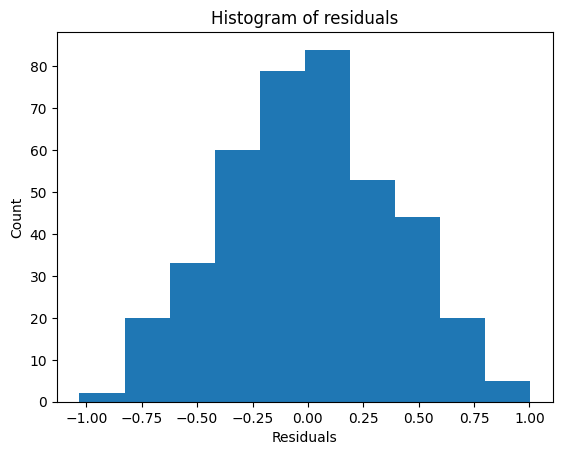

In [23]:
# Residuals mean
print("Residuals means = {x}".format(x=df.gpa_redisuals.mean()))

# Plot histogram of the residuals
plt.hist(df.gpa_redisuals)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Histogram of residuals")
plt.show()


In [24]:
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     9.959
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.10e-07
Time:                        23:00:23   Log-Likelihood:                -179.28
No. Observations:                 400   AIC:                             368.6
Df Residuals:                     395   BIC:                             388.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9041      0.02

<br>

As can be seen there is a strong association between the gpa score and education of the parent as well as the type of the school, but not between the likelihood to apply.

End
***